<a href="https://colab.research.google.com/github/vicentemaartinez/Tarea-2/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [14]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [15]:
# Velocidad de las estrella
v = 1

# Convertimos 0.5 grados a mas
mas = 0.5 * 3.6e6

# Calculamos los años
años = mas / v

# Mostramos el resultado
print(f'A la estrella le tomaría {años} años cubrir 0.5 grados en el cielo.')

A la estrella le tomaría 1800000.0 años cubrir 0.5 grados en el cielo.


### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [17]:
# Ruta hacia el archivo
path_archivo = '/content/drive/MyDrive/Colab Notebooks/tarea2mod/ngc5694_pm.csv'

# Abrimos el archivo
data = pd.read_csv(path_archivo)

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [18]:
# Mostramos las columnas con df.columns
data.columns

Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')

In [19]:
# Mostramos el dataframe con
data

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
...,...,...,...,...,...
616,616,220.732855,-26.148055,-0.269935,-0.891652
617,617,220.710525,-26.150902,-0.962554,-0.400258
618,618,219.327652,-27.267281,-0.796753,-0.266571
619,619,219.225796,-27.172318,-0.901963,-0.302597


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [20]:
# Creamos el arreglo de movimiento propio en ascensión recta con su columna respectiva
pmra = data['pmra']

# Creamos la columna de movimiento propio en declinación con su columna respectiva
pmdec = data['pmdec']

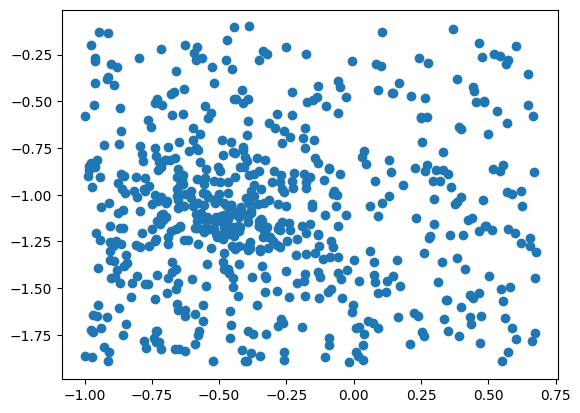

In [21]:
# Hacemos un gráfico de dispersión con scatter
plt.scatter(pmra, pmdec)
plt.show()

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [22]:
# De pmra calculamos promedio con mean y desviación estándar con std
mu_pmra = pmra.mean()
std_pmra = pmra.std()

# De pmdec calculamos promedio con mean y desviación estándar con std
mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()

Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [23]:
from scipy.stats import norm

# Creamos un arreglo equiespaciado con linspace y la distribución gaussiana con norm.pdf
x_pmra = np.linspace(-1.5, 1.5, 300)
fx_pmra = norm.pdf(x_pmra, mu_pmra, std_pmra)

# Creamos un arreglo equiespaciado con linspace y la distribución gaussiana con norm.pdf
x_pmdec = np.linspace(-2.5, 0.5, 300)
fx_pmdec = norm.pdf(x_pmdec, mu_pmdec, std_pmdec)

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

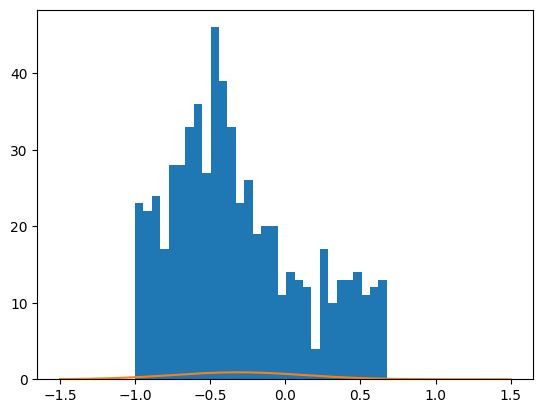

In [24]:
# Creamos el histograma
plt.hist(pmra, bins=30)

# Graficamos la distribución
plt.plot(x_pmra, fx_pmra)

# Mostramos el gráfico
plt.show()

Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

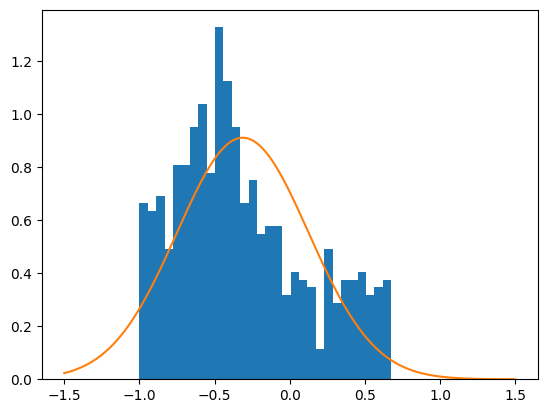

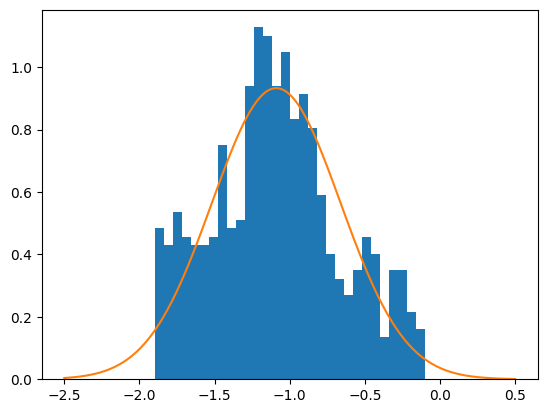

In [25]:
# Creamos la figura anterior de pmra pero con density = True
plt.hist(pmra, bins=30, density=True)
plt.plot(x_pmra, fx_pmra)
plt.show()

# Creamos la figura anteriorde pmdec pero con density = True
plt.hist(pmdec, bins=30, density=True)
plt.plot(x_pmdec, fx_pmdec)
plt.show()

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

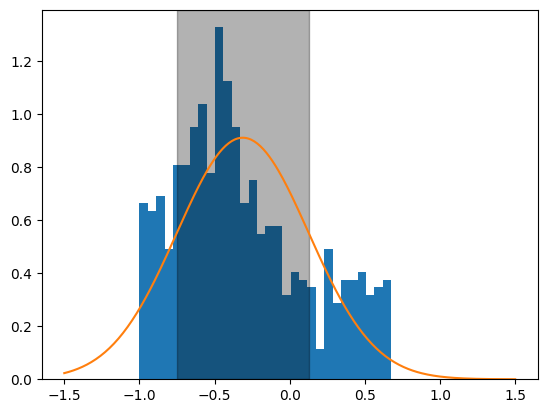

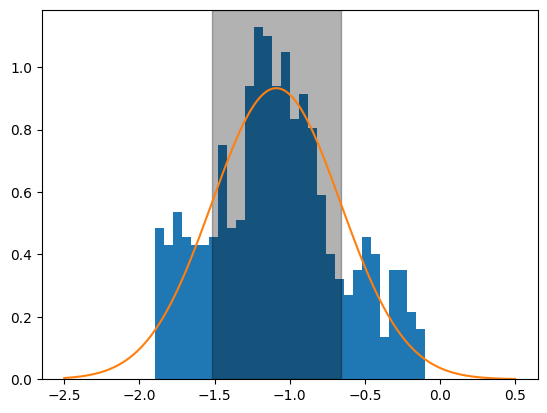

In [26]:
# Mostramos la figura anterior de pmra
plt.hist(pmra, bins=30, density=True)
plt.plot(x_pmra, fx_pmra)
plt.axvspan(mu_pmra - std_pmra, mu_pmra + std_pmra, color = 'k', alpha = 0.3) # Añadimos la franja vertical desde (μ-σ) a (μ+σ), alpha corresponde a la opacidad de la misma.
plt.show()

# Mostramos la figura anterior de pmdec
plt.hist(pmdec, bins=30, density=True)
plt.plot(x_pmdec, fx_pmdec)
plt.axvspan(mu_pmdec - std_pmdec, mu_pmdec + std_pmdec, color = 'k', alpha = 0.3)  # Añadimos la franja vertical desde (μ-σ) a (μ+σ), alpha corresponde a la opacidad de la misma.
plt.show()

Según las gaussiaas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:**

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [37]:
# Abrimos y leemos el archivo
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tarea2mod/data_spectra.csv')

### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:**

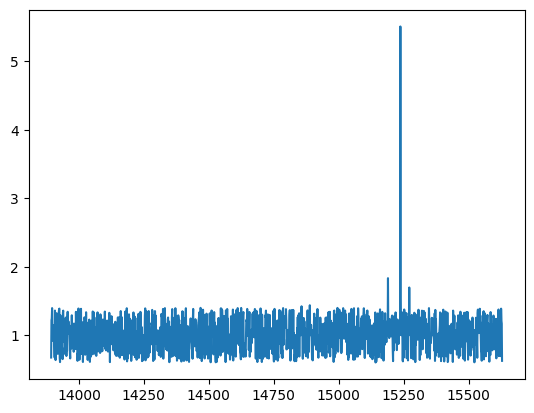

In [38]:
# Graficamos lo pedido con plot
plt.plot(data['Wlth'], data['obs_1'])
plt.show()

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Para poder calcular el valor medio del ruido podemos usar la función mean en los datos de obs_1, como la gran mayoría de los datos son ruido este promedio debería ser una buena aproximación, luego para restarlo simplemente restamos este valor a la columna a la hora de graficar.

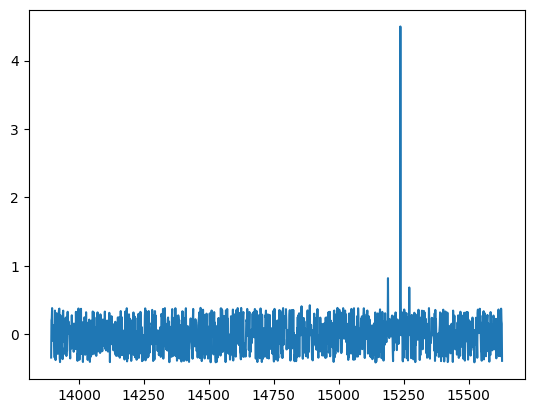

In [29]:
# Calculamos el promedio de las observaciones
promedioRuido = data['obs_1'].mean()

# Graficamos restando el promedio a las observaciones
plt.plot(data['Wlth'], data['obs_1'] - promedioRuido)
plt.show()

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [30]:
# Calculamos la desviación estpandar de los datos
std_obs1 = data['obs_1'].std()

# Definimos el ruido como los datos que cumplen lo pedido
ruido = data['obs_1'][np.abs(data['obs_1'] - data['obs_1'].mean()) < 3 * std_obs1] # Ocupamos abs para abarcar ±3σ

2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

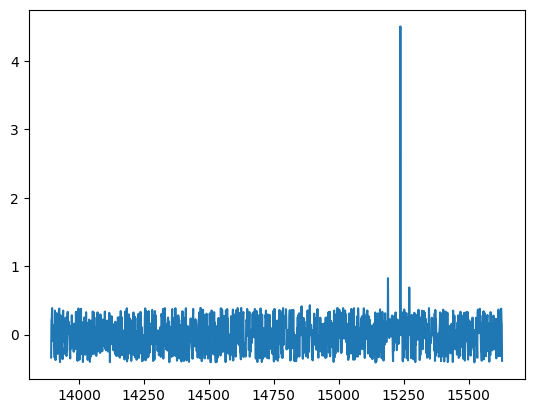

In [31]:
# Calculamos el promedio del ruido
promedioRuido = ruido.mean()

# Graficamos restando el promedio
plt.plot(data['Wlth'], data['obs_1'] - promedioRuido)
plt.show()

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:**

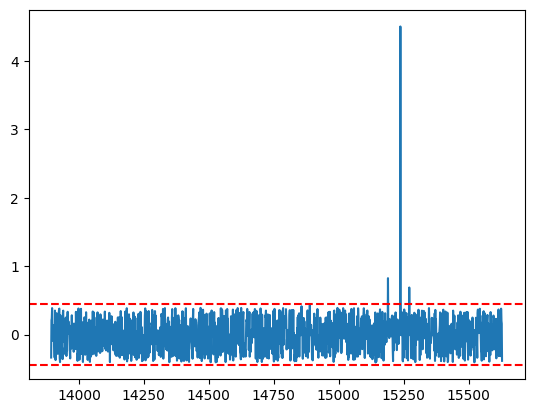

In [32]:
# Calculamos la desviación estándar
stdRuido = ruido.std()

# Definimos el entero n
n = 2

# Graficamos lo pedido
plt.plot(data['Wlth'], data['obs_1'] - promedioRuido)

# Añadimos las lineas pedidas
plt.axhline(n * stdRuido, color = 'r', linestyle = '--')
plt.axhline(-(n * stdRuido), color = 'r', linestyle = '--')

# Mostramos el gráfico
plt.show()

### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [39]:
# Recorremos las observaciones (de la segunda columna en adelante) y le restamos su promedio para centrar en 0
for i in range(len(data.iloc[:, 2:].columns) - 1):
  data.iloc[:, 2:] -= data.iloc[:, 2:].mean()

2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [34]:
# Creamos la lista de desviaciones estándar
sigmas = []
for i in range(2, len(data.columns) - 1):
  obsProm = data.iloc[:, 2:i+1].mean(axis=1) # Calculamos el promedio de cada fila para las columnas i + 1 columnas
  sigmas.append(obsProm.std()) # Añadimos la desviación estándar de los promedios anteriores a la lista

promedios = data.iloc[:, 2:].mean(axis=1) # Promediamos cada fila
data['obs_all'] = promedios # Añadimos los promedios al dataframe

 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:**

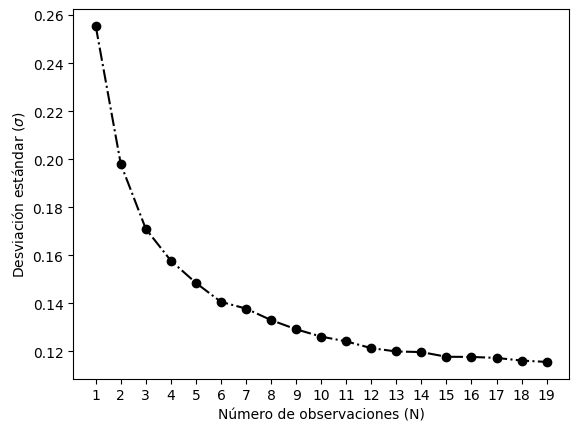

In [35]:
# Creamos un arreglo con el número de observaciones
N = np.arange(1, len(sigmas) + 1, 1)

# Añadimos etiquetas al eje x para que muestre cada número
plt.xticks(N)

# Graficamos lo pedido, cambiamos la línea para que ver claramente donde está el valor de cada observación añadida
plt.plot(N, sigmas, color = 'k', linestyle = 'dashdot', marker = '.', markersize = 12)

# Añadimos nombres a los ejes
plt.xlabel('Número de observaciones (N)')
plt.ylabel(r'Desviación estándar ($\sigma$)')

# Mostramos el gráfico
plt.show()

### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:**

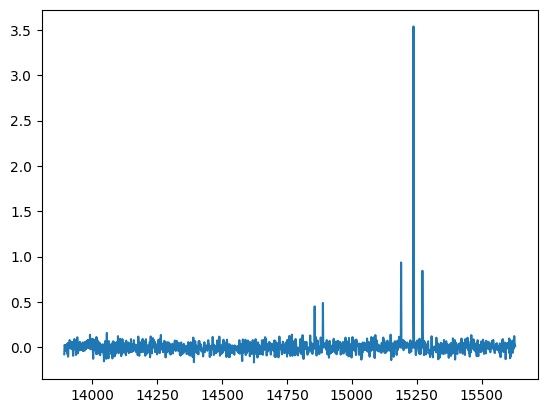

In [36]:
# Graficamos lo pedido
plt.plot(data['Wlth'], data['obs_all'])
plt.show()